# Experimental Model for a Forest Fire Observation Drone

Copyright 2023 MBSE4U


Since it is an experimental model, it is neither complete nor correct. Be inspired and feel free to provide feedback tim@mbse4u.com.



In [40]:
package ForestFireObservationDrone {
    
    import Drone_SharedAssetsSuperset::**;
    
    part forestFireObservationDrone : Drone {
        
        // Power System
        :>> battery = battery::longDistanceBattery;
        
        part charger;
        part powerManagementModule {
            port ctrlPort {
                out attribute status : BatteryCapacityKind;
            }
            
            perform action checkStatus {
                out attribute status : BatteryCapacityKind;
                
                first start;
                then action getBatteryStatus;
                then action analyseStatus;
                then done;
            } 
        }

        // Flight Control System
        part droneControlUnit {
            port powerCtrlPort {
                in attribute batteryStatus : BatteryCapacityKind;
            }
        }
        part gpsModule;
        part inertialMeasurementUnit;
        part barometer;
        
        // Drone Frame
        part body;
        part rotors[4];
        part arms[4];
        part landingGear;
        
        // Communication System
        part radioTransmitter;
        part radioReceiver;
        part antenna;
        
        // Sensors
        part camera;
        part obstacleAvoidanceSensor;
        
        // Engine
        part engine1 : DroneEngine {
            :>> propKind = PropKind::clockwise;
        }
        part engine2 : DroneEngine {
            :>> propKind = PropKind::counterclockwise;
        }
        part engine3 : DroneEngine {
            :>> propKind = PropKind::clockwise;
        }        
        part engine4 : DroneEngine {
            :>> propKind = PropKind::counterclockwise;
        }
        
        // Connections
        connect droneControlUnit.powerCtrlPort to powerManagementModule.ctrlPort;
        connect battery to powerManagementModule;
        connect powerManagementModule to engine1;
        connect powerManagementModule to engine2;
        connect powerManagementModule to engine3;
        connect powerManagementModule to engine4;                    
    }
}

Package ForestFireObservationDrone (62762428-6d3a-4fa2-a73f-62108196b3b0)


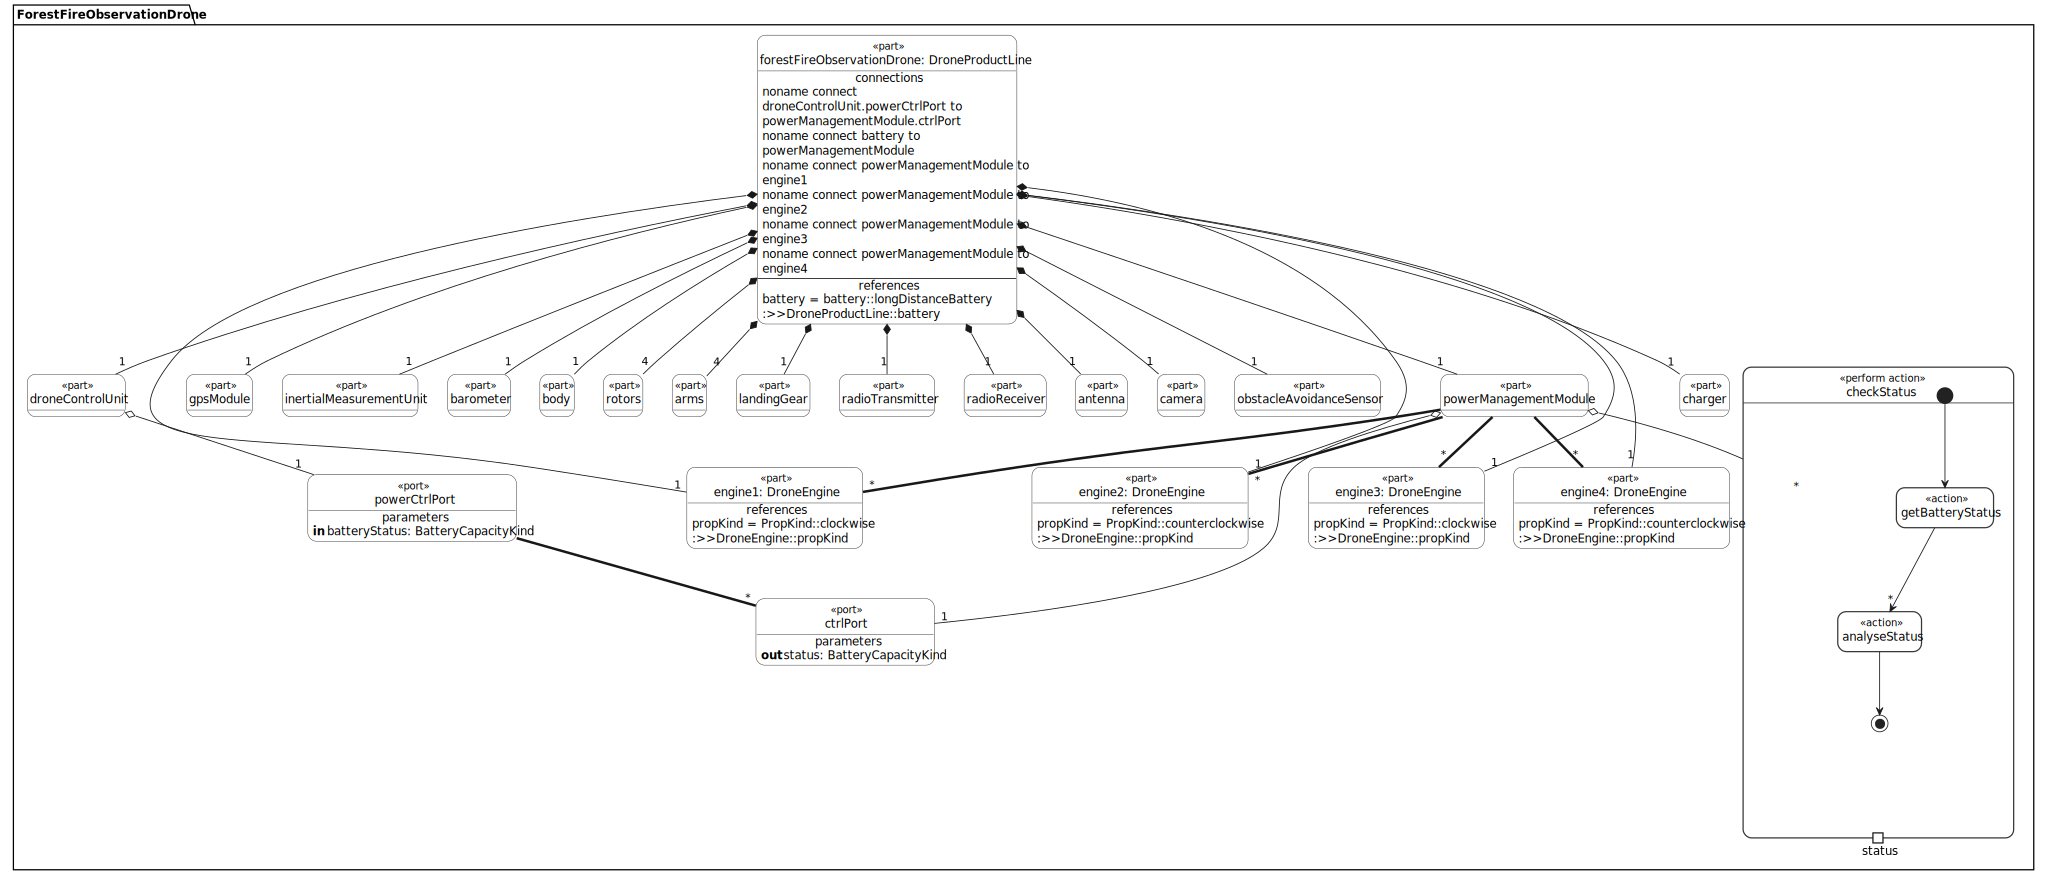

In [7]:
%viz ForestFireObservationDrone

# Feature Model

In [2]:
package Drone_FeatureModel {
    
    requirement <'FD1'> droneFeatures : Feature {
        
        doc /* Root feature of the drone product line */
                    
        requirement <'FD1.1'> numberOfEngines : Feature {
            doc /* The drone product line offers drones with four or with six engines. */

            :>> bindingTime := BindingTimeKind::Design;
                
            requirement <'FD1.1.1'> fourEngines [0..1] : Feature {
                doc /* A drone with four engines. */
            }
            requirement <'FD1.1.2'> sixEngines [0..1] : Feature {
                doc /* A drone with six engines. */
                require batteryKind.longDistanceBattery;
            }
            
            require constraint {
                (fourEngines == null) xor (sixEngines == null)
            }        
        }
        
        requirement <'FD1.2'> batteryKind : Feature {
            doc /* The drone product line offers standard batteries and more powerful batteries for long distance flights. */

            :>> bindingTime := BindingTimeKind::Operation;
                
            requirement <'FD1.2.1'> standardBattery [0..1] : Feature {
                doc /* Standard battery with a capacity of at least 3000 mAh. */
            }
            requirement <'FD1.2.2'> longDistanceBattery [0..1] : Feature {
                doc /* Battery for long distance flights with a capacity of at least 5000 mAh. */
            }
        }
        
        requirement <'FD1.3'> safetyFeatures [0..1] : Feature {
            :>> bindingTime := BindingTimeKind::Design;
            requirement <'FD1.3.1'> geoFencing [0..1] : Feature;
            requirement <'FD1.3.2'> returnHome [0..1] : Feature;
            requirement <'FD1.3.3'> collisionAvoidance [0..1] : CollisionAvoidance;
        }
        
        requirement <'FD1.4'> autonomousFlight [0..1] : Feature  {
            :>> bindingTime := BindingTimeKind::Design;
            requirement <'FD1.4.1'> collisionAvoidance [0..1] : CollisionAvoidance;
            requirement <'FD1.4.2'> flightPathDefinition[0..1] : Feature;
            requirement <'FD1.4.3'> flightDestinationDefinition[0..1] : Feature;
        }
        
        requirement def CollisionAvoidance :> Feature;
        
        requirement <'FD1.5'> flightControls [0..1] : Feature {
            :>> bindingTime := BindingTimeKind::Production;
            requirement <'FD1.5.1'> flyObservationPatterns[0..1] : Feature;
            requirement <'FD1.5.2'> flyCameraPatterns[0..1] : Feature;
            requirement <'FD1.5.3'> flyFunPatterns[0..1] : Feature;
        }
        
        requirement <'FD1.6'> bodyColor : Feature {
            :>> bindingTime := BindingTimeKind::Production;
            requirement <'FD1.6.1'> redBody[0..1] : Feature;
            requirement <'FD1.6.2'> whiteBody[0..1] : Feature;
            requirement <'FD1.6.3'> blueBody[0..1] : Feature;
            requirement <'FD1.6.4'> blackBody[0..1] : Feature;  
        }
        
        //
        // Feature Configurations
        //
        requirement <'FDFC1'> standardObserverationDrone :> droneFeatures {
            doc /* A standard drone with basic capabilities. */
            :>> numberOfEngines = numberOfEngines.fourEngines;
            :>> batteryKind {
                :>> standardBattery[0];
                :>> longDistanceBattery[1];
            }
            :>> safetyFeatures[0];
            :>> autonomousFlight[1] {
                :>> collisionAvoidance[0];
                :>> flightPathDefinition[1];
                :>> flightDestinationDefinition[0];
            }
            :>> flightControls {
                :>> flyObservationPatterns[1];
                :>> flyCameraPatterns[0];
                :>> flyFunPatterns[0];
            }
            :>> bodyColor {
                :>> redBody[0];
                :>> whiteBody[0];
                :>> blueBody[1];
                :>> blackBody[0];
            }
        }

        requirement <'FDFC2'> forestFireObserverationDrone :> droneFeatures {
            :>> numberOfEngines = numberOfEngines.sixEngines;
            :>> batteryKind {
                :>> standardBattery[0];
                :>> longDistanceBattery[1];
            }
            :>> safetyFeatures[1] {
                :>> collisionAvoidance[1];
                :>> returnHome[1];
            }
            :>> autonomousFlight[1] {
                :>> collisionAvoidance[1];
                :>> flightPathDefinition[1];
                :>> flightDestinationDefinition[1];
            }
            :>> flightControls {
                :>> flyObservationPatterns[1];
                :>> flyCameraPatterns[0];
                :>> flyFunPatterns[0];
            }            
            :>> bodyColor {
                :>> redBody[1];
                :>> whiteBody[0];
                :>> blueBody[0];
                :>> blackBody[0];
            }            
        }     
    }
    
    requirement def Feature {
        attribute bindingTime : BindingTimeKind = BindingTimeKind::Design;
    }
    
    enum def BindingTimeKind {
        enum Design;
        enum Production;
        enum Operation;
    }    
}


Package Drone_FeatureModel (bb36307f-e0e3-4681-b2be-52131b47782c)


In [1]:
package Drone_FeatureModel {
    
    import PLEML::*;
    
    #feature droneFeatures {    
        #requiredFeature requirement numberOfEngines {
            #feature fourEngines[0..1];
            #feature sixEngines [0..1] {
                #requiredFeature rf1 = batteryKind.longDistanceBattery;
            }
            require constraint {
                (fourEngines == null) xor (sixEngines == null)
            }                
        }
        
        #requiredFeature batteryKind {
            #feature standardBattery;
            #feature longDistanceBattery;
        }
        
        #requiredFeature flightControls {
            #feature flyObservationPatterns;
            #feature flyCameraPatterns;
            #feature flyFunPatterns;
        }
    } 

    #featureConfiguration forestFireObservationDrone :> droneFeatures {
        :>> droneFeatures.numberOfEngines.sixEngines[1];
        :>> droneFeatures.batteryKind.longDistanceBattery[1];
        :>> droneFeatures.flightControls.flyObservationPatterns[1];
    }
    
    view DroneFeatureTree {
        expose droneFeatures::**;
        render Views::asTreeDiagram;
    }
}

ERROR:Couldn't resolve reference to Namespace 'PLEML'. (1.sysml line : 3 column : 12)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 5 column : 6)
ERROR:Couldn't resolve reference to Type 'requiredFeature'. (1.sysml line : 6 column : 10)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 7 column : 14)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 8 column : 14)
ERROR:Couldn't resolve reference to Type 'requiredFeature'. (1.sysml line : 16 column : 10)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 18 column : 14)
ERROR:Couldn't resolve reference to Type 'requiredFeature'. (1.sysml line : 9 column : 18)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 17 column : 14)
ERROR:Couldn't resolve reference to Type 'requiredFeature'. (1.sysml line : 21 column : 10)
ERROR:Couldn't resolve reference to Type 'feature'. (1.sysml line : 22 column : 14)
ERROR:Couldn't resolve reference to Type 'featur

# Shared Asset Superset

The shared asset superset contains all shared assets of the drone product line. The forest fire observation drone is one product of the product line. Other member products could be a camera drone, a surveillance drone, and so forth.

In [13]:
library package Drone_SharedAssetSuperset {
    
    package Drone {
               
        import DroneBattery::**;
        import DroneEngine::**;
        import DroneBody::**;
        import DroneFlightControlSoftware::**;  
        
        abstract part def Drone {
            
            // Attributes
            attribute massActual : ISQ::MassValue;
            
            
            // Spatial extent
            item :>> shape = body.shape;
            item boundingBox :> boundingShapes = body.boundingBox;
            
            // Timeslices            
            timeslice parking {
                snapshot startCharging {
                    // model some start charging conditions
                }
                then snapshot stopCharging;
            }
            then timeslice flying {
                :>> battery[1];
            }
            
            // States
            state droneStates {
                entry; then off;

                state off;
                accept SigSwitchOn then standBy;
                state standBy;
                accept SigSwitchOff then off;
                transition standBy_charging
                    first standBy
                    accept SigStartCharging
                    then charging;
                transition standBy_ready 
                    first standBy
                    accept SigActivate
                    then ready;
                state charging;
                    transition charging_standBy
                        first charging
                        accept SigStopCharging
                        then standBy;
                state ready;
                accept SigDeactivate then standBy;
                transition ready_flying
                    first ready
                    accept SigStartFlying 
                    then flying;
                
                state flying;    
                accept SigStopFlying then ready;
            }
            
            // Signals
            attribute def SigStartCharging;
            attribute def SigStopCharging;
            attribute def SigSwitchOn;
            attribute def SigSwitchOff;
            attribute def SigActivate;
            attribute def SigDeactivate;
            attribute def SigStartFlying;
            attribute def SigStopFlying;
            
            // Power
            part battery :> droneBatteryVariation;
            message notifyBatteryLow of SigBatteryLow from battery.batteryManagementSystem to flightControl;
            
            // Engines
            variation attribute numberOfEngines : ScalarValues::Integer {
                variant attribute fourEngines = 4;
                variant attribute sixEngines = 6;
            }
            assert constraint { 
                (numberOfEngines == numberOfEngines::sixEngines) and 
                (battery == DroneBattery_Variation::droneBatteryVariation::longDistanceBattery) 
            }
            satisfy Drone_FeatureModel::droneFeatures.numberOfEngines by numberOfEngines;                
            part engine[numberOfEngines] : DroneEngine;
            
            // Body
            part body :> droneBodyVariation;
            
            // Flight Control
            part flightControl :> droneFlightControlSoftwareVariation;
        }

        //
        // Drone Requirements
        //
        package Drone_Requirements {
        
            requirement droneStakeholderRequirements {
                subject drone : Drone;
                
                require droneEngineStakeholderRequirements;
                require droneBatteryStakeholderRequirements;
                
                variation requirement maximumTakeoffWeight {
                    variant requirement mtqw_Quadcopter : MTOW_Quadcopter;
                    variant requirement mtqw_Hexacopter : MTOW_Hexacopter;
                }
            }

            requirement def <'D-REQ-22'> MTOW {
                
                subject drone : Drone;
                
                doc /*
                    * The maximum takeoff weight (MTOW) for a drone shall not exceed [X] kilograms. 
                    * This includes the weight of the drone itself, its battery, payload, and any additional 
                    * attached equipment. [X] depends on the number of engines.
                    */
                    
                attribute mtow : ISQ::MassValue;
                require constraint { drone.massActual <= mtow }
            }
            
            
            requirement def <'D-REQ-23'> MTOW_Quadcopter :> MTOW {
                doc /*
                    * The maximum takeoff weight (MTOW) for a quadcopter equipped with 4 engines shall not exceed 
                    * 15 kilograms. 
                    */
                :>> mtow = 15[SI::kg];
            }

            requirement def <'D-REQ-24'> MTOW_Hexacopter :> MTOW {
                doc /*
                    * The maximum takeoff weight (MTOW) for a hexacopter equipped with 6 engines shall not exceed 
                    * 25 kilograms. 
                    */
                :>> mtow = 25[SI::kg];
            }
        }
        
        //
        // Drone Use Cases
        //
        package Drone_UseCases {
            use case observeArea {
                in item hi_observationArea;
                subject drone : Drone;
            
                first start;
                then action defineObservationArea {
                    in item hi_observationArea = observeArea::hi_observationArea;
                    out item observationArea;
                }
                then action approachArea {
                    in item observationArea;
                }
                then action flyObservationPatterns;
                then action returnToHomeBase;
                then done;            
            
                flow defineObservationArea.observationArea to approachArea.observationArea;
            }
        
            use case chargeDrone {
                subject drone : Drone;
            
                first start;
                then action plugDrone;
                then action chargeDroneBatteries;
                then done;
            }        
        }
    }
     
    //
    // Drone Engine Shared Assets
    //
    package DroneEngine {
        
        package DroneEngine_StakeholderRequirements {
            
            import DroneEngine_Parts::*;
            
            variation requirement droneEngineStakeholderRequirements {
                variant requirement droneEngineStandardStakeholderRequirements {
                    
                    subject engine : DroneEngine;
                                        
                    requirement power : Power;
                    requirement efficiency : Efficiency;
                    requirement durability : Durability;
                    requirement reliability : Reliability;
                    requirement lightweight : Lightweight;
                    requirement control : Control;
                    requirement compatibility : Compatibility;
                    requirement safety : Safety;
                    requirement costEffective : CostEffective;
                }
                variant requirement droneEngineLowNoiseStakeholderRequirements :> droneEngineStandardStakeholderRequirements {
                    requirement lowNoise : LowNoise;
                }
            }
            
            requirement def <'DE-REQ-1'> Power {
                doc /*
                    * The engine shall provide enough power to lift the drone off the ground and keep it in the air. 
                    * The power output shall be appropriate for the size and weight of the drone.
                    */
            }
            requirement def <'DE-REQ-2'> Efficiency {
                doc /*
                    * The engine shall be efficient, allowing the drone to fly for an extended period on a single charge. 
                    * The engine shall be designed to minimize energy loss through friction and heat.
                    */
            }
            requirement def <'DE-REQ-3'> Durability {
                doc /*
                    * The engine shall be able to withstand the stress of continuous use and exposure to the elements. 
                    * It shall be able to operate in a wide range of temperatures and weather conditions.
                    */
            }
            requirement def <'DE-REQ-4'> Reliability {
                doc /*
                    * The engine shall be reliable, with minimal downtime or maintenance requirements. 
                    * It shall be designed with high-quality components and undergo rigorous testing before deployment.
                    */
            }
            requirement def <'DE-REQ-5'> LowNoise {
                doc /*
                    * The engine shall produce minimal noise to avoid disturbing the environment or attracting unwanted attention.
                    */
            }
            requirement def <'DE-REQ-6'> Lightweight {
                doc /*
                    * The engine shall be lightweight, allowing for maximum payload capacity and longer flight times.
                    */
            }
            requirement def <'DE-REQ-7'> Control {
                doc /*
                    * The engine shall be easy to control, allowing for precise maneuverability and responsiveness to commands.
                    */
            }
            requirement def <'DE-REQ-8'> Compatibility {
                doc /*
                    * The engine shall be compatible with the drone's power supply and electronic components.
                    */
            }
            requirement def <'DE-REQ-9'> Safety {
                doc /*
                    * The engine should be designed with safety in mind, minimizing the risk of injury or damage in case of malfunction. 
                    * It should have fail-safe mechanisms to prevent accidents and minimize damage in case of emergency.
                    */
            }
            requirement def <'DE-REQ-10'> CostEffective {
                doc /*
                    * The engine shall be cost-effective, balancing performance and quality with affordability. 
                    * It shall provide value for money, with a low cost of ownership and maintenance.            
                    */
            }            
        }
        
        package DroneEngine_Parts {
            part def DroneEngine {
                enum propKind : PropKind;
            
                enum def PropKind {
                    enum clockwise;
                    enum counterclockwise;
                }            
            }
        }                        
    }
    
    
    //
    // Drone Body Shared Assets
    //

    package DroneBody {
        
        package DroneBody_Parts {
            
            import DroneBody_Domain::*;

            variation part droneBodyVariation : DroneBody {
                variant part droneBody4Engines : DroneBody {
                    // to be done: redefines size
                    satisfy Drone_FeatureModel::droneFeatures.numberOfEngines.fourEngines by self;
                }
                variant part droneBody6Engines : DroneBody {
                    // to be done: redefines size
                    satisfy Drone_FeatureModel::droneFeatures.numberOfEngines.sixEngines by self;
                }
            }            
            
            abstract part def DroneBody {
                // Spatial extent
                item :>> shape : ShapeItems::Cylinder {
                    :>> height = 20 [SI::cm];
                    :>> base.shape : ShapeItems::Circle {
                        :>> radius = 60 [SI::cm];
                    }
                }
                item boundingBox : ShapeItems::Box [1] :> boundingShapes {
                    :>> length = 120 [SI::cm];
                    :>> width  = 120 [SI::cm];
                    :>> height = 20 [SI::cm];
                }            
                
                variation attribute bodyColor : BodyColorKind {
                    variant attribute redColor : BodyColorKind = BodyColorKind::red {
                        satisfy Drone_FeatureModel::droneFeatures.bodyColor.redBody by self;
                    }
                }
            }
        }
        
        package DroneBody_Domain {            
            enum def BodyColorKind {
                enum red;
                enum white;
                enum blue;
                enum black;
            }
        }
    }
    
    
    //
    // Drone Flight Control Software Shared Assets
    //
    
    package DroneFlightControlSoftware {
        
        package DroneFlightControlSoftware_Parts {
            
            variation part droneFlightControlSoftwareVariation : DroneFlightControlSoftware {
                variant part droneFlightControl4Engines : DroneFlightControlSoftware {
                    satisfy Drone_FeatureModel::droneFeatures.numberOfEngines.fourEngines by self;
                }
                variant part droneFlightControl6Engines : DroneFlightControlSoftware {
                    satisfy Drone_FeatureModel::droneFeatures.numberOfEngines.sixEngines by self;
                }
            }
                        
            abstract part def DroneFlightControlSoftware;
        }
    }

    //
    // Drone Battery Shared Assets
    //   
    
    package DroneBattery {
        
        package DroneBattery_Domain {
            attribute def SigBatteryLow {
                attribute capacity : ISQElectromagnetism::ElectricChargeValue;
            }
        }
        
        package DroneBattery_Parts {

            variation part droneBatteryVariation[0..*] : DroneBattery {
                variant part standardBattery : StandardDroneBattery {
                    satisfy Drone_FeatureModel::droneFeatures.batteryKind.standardBattery by self;
                }
                variant part longDistanceBattery : LongDistanceDroneBattery {
                    satisfy Drone_FeatureModel::droneFeatures.batteryKind.longDistanceBattery by self;
                }
            }            
            
            abstract part def DroneBattery {
                // Attributes
                attribute weight : ISQBase::MassValue; 
                attribute maxCapacity : ISQElectromagnetism::ElectricChargeValue;
                enum currentCapacityLevel : BatteryCapacityKind;
                enum def BatteryCapacityKind :> ScalarValues::Integer {
                    enum full = 100;
                    enum medium = 50;
                    enum low = 30;
                    enum critical = 15;
                }
            
                // Parts
                part batteryCells {
                    doc /* The battery cells are the main components of the drone battery 
                         * that store the electrical energy. These cells are usually Lithium Polymer (LiPo) 
                         * or Lithium-Ion (Li-Ion) cells.
                        */
                }
                part batteryManagementSystem {
                    doc /* The Battery Management System (BMS) is a control unit that manages the charging and 
                         * discharging of the battery cells. It ensures that the cells are charged and discharged 
                         * correctly and safely.
                         */
                }
                part protectionCircuit {
                    doc /* The protection circuit is a safety mechanism that protects the battery from overcharging, 
                         * over-discharging, and short circuits.
                        */
                }
                part powerConnector {
                    doc /* The power connector is the interface that connects the battery to the drone's power system. 
                        * It delivers the electrical energy from the battery to the drone.
                        */
                }
                part chargingInterface {
                    doc /* The charging interface is the interface that connects the battery to the charger. 
                         * It allows the battery to be charged safely and efficiently.
                        */
                }
                part batteryIndicator {
                    doc /* The battery indicator is a component that displays the remaining battery charge. 
                         * It allows the pilot to monitor the battery level and plan flight time accordingly.
                        */
                }
                part communicationInterface {
                    doc /* The communication interface is a component that allows the battery to communicate 
                         * with the drone's flight controller. It provides important battery information such 
                         * as voltage, current, and temperature to the flight controller.
                        */
                    }
                part firmware {
                    doc /* The firmware is the software that runs on the battery management system. 
                         * It controls the charging and discharging of the battery cells and ensures 
                         * that the battery operates safely and efficiently.
                        */
                }
            }
                             
            part def StandardDroneBattery :> DroneBattery {
                :>> weight = 275[SI::g];
                :>> maxCapacity = 13680[SI::'s⋅A'];
            }
            part def LongDistanceDroneBattery :> DroneBattery {
                :>> weight = 315[SI::g];
                :>> maxCapacity = 18000[SI::'s⋅A'];
            }
        }
            
        package DroneBattery_SystemRequirements {
            
            import RequirementDerivation::*;
            import DroneBattery_StakeholderRequirements::*;
            import DroneBattery_Parts::*;
            
            variation requirement droneBatterySystemRequirements {
                variant requirement droneBatteryStandardSystemRequirements {
                    satisfy Drone_FeatureModel::droneFeatures.batteryKind.standardBattery by self;
                    subject battery : DroneBattery;    
                }
                variant requirement droneBatteryLongDistanceSystemRequirements {
                    satisfy Drone_FeatureModel::droneFeatures.batteryKind.longDistanceBattery by self;
                    subject battery : DroneBattery;
                    
                    requirement longDistanceCapacity : LongDistanceCapacity;
                    #derivation connection {
                        end #original ::> droneBatteryStakeholderRequirements.highCapacity;
                        end #derive ::> longDistanceCapacity;
                    }
                }                                               
            }
            satisfy Drone_FeatureModel::droneFeatures.batteryKind by droneBatterySystemRequirements;
            
            requirement def <'DB-REQ-421'> LongDistanceCapacity {
                doc /* The battery shall have a capacity of at least 13860 sA, which provides enough power for extended flight times. */
                    
                subject battery : DroneBattery;
                
                assert constraint {
                    (battery.maxCapacity >= 13860[SI::'s⋅A'])
                }
            }
        }
        
        package DroneBattery_StakeholderRequirements {
            
            import DroneBattery_Parts::*;
            
            requirement droneBatteryStakeholderRequirements {
                
                subject battery : DroneBattery;
                
                requirement lightweight : Lightweight;
                requirement highCapacity : HighCapacity;
                requirement fastCharging : FastCharging;
                requirement longLife : LongLife;
                requirement safe : Safe;
                requirement compatible : Compatible;
                requirement reliable : Reliable;
                requirement affordable : Affordable;
                requirement easyToInstall : EasyToInstall;
            }
            
            requirement def <'DB-REQ-2'> Lightweight {
                doc /*
                     * A drone battery shall be lightweight to keep the overall weight of the drone 
                     * to a minimum, which is essential for stable flight.
                    */
            }

            requirement def <'DB-REQ-3'> HighCapacity {
                doc /*
                     * A drone battery shall have a high capacity to provide the drone with enough power 
                     * to fly for a reasonable amount of time.
                    */
            }

            requirement def <'DB-REQ-4'> FastCharging {
                doc /*
                     * A drone battery shall be able to charge quickly so that the drone can 
                     * get back in the air as soon as possible.
                    */
            }

            requirement def <'DB-REQ-5'> LongLife {
                doc /*
                     * A drone battery shall have a long life to avoid the need for frequent replacements.
                    */
            }

            requirement def <'DB-REQ-6'> Safe {
                doc /*
                     * A drone battery shall be designed to be safe, with features such as overcharge protection, 
                     * short circuit protection, and temperature control.
                    */
            }

            requirement def <'DB-REQ-7'> Compatible {
                doc /*
                     * A drone battery shall be compatible with the drone's power system to ensure proper functioning.
                    */
            }
            
            requirement def <'DB-REQ-8'> Reliable {
                doc /*
                     * A drone battery shall be reliable, with consistent performance and the ability to withstand 
                     * the stresses of flight and charging cycles.
                    */
            }

            requirement def <'DB-REQ-9'> Affordable {
                doc /*
                     * A drone battery shall be reasonably priced, to avoid being a significant expense for drone pilots.
                    */
            }
            
            requirement def <'DB-REQ-10'> EasyToInstall {
                doc /*
                     * A drone battery shall be easy to install and remove to make it easy for pilots to swap out batteries when necessary.
                    */
            }
        }
    }    
}


LibraryPackage Drone_SharedAssetSuperset (9318dc4e-4e29-49c5-a61d-7df1cbf268a5)


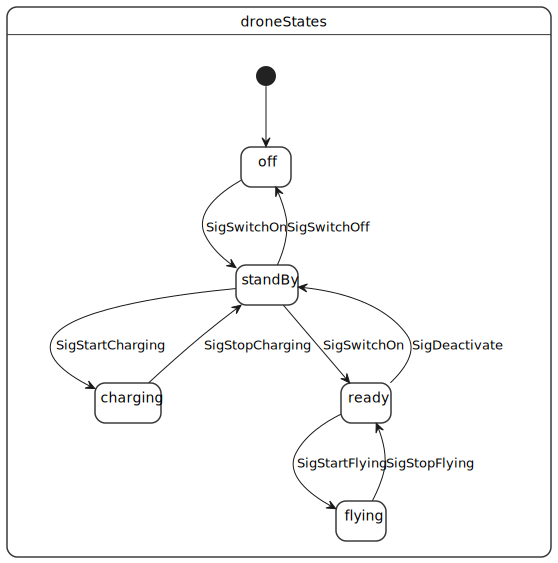

In [38]:
%viz --view=state Drone_SharedAssetSuperset::DroneProductLine::Drone::droneStates

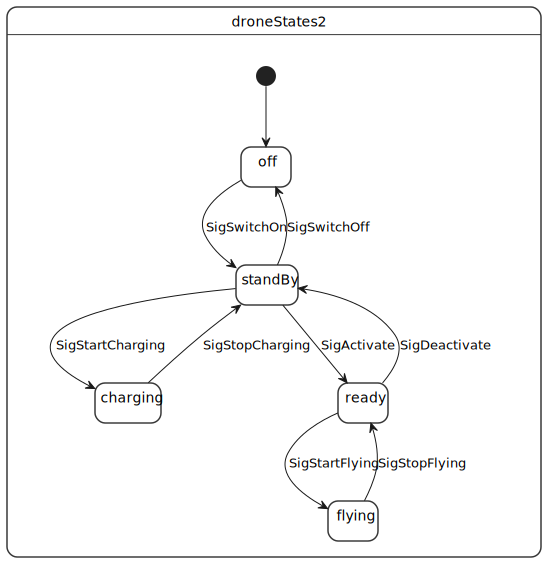

In [37]:
%viz --view=state Drone_SharedAssetSuperset::DroneProductLine::Drone::droneStates2

In [13]:
%show Drone_SharedAssetsSuperset::DroneProductLine::Drone

PartDefinition Drone (1952cdb5-1cb9-421e-8d14-9e0a0f589646)
  [Subclassification (implicit)] PartDefinition Part (71ca925d-ad00-40a8-b36e-a20f989ae60b)
  [FeatureMembership] PartUsage battery (b79b16d3-12bc-47dd-8c6f-8c3c8cbde227)
    [Subsetting (implicit)] PartUsage subparts (853bfa29-73bf-428a-b954-78b319b74985)
    [Subsetting] PartUsage droneBatteryVariation (6511fc06-05e1-4caa-b12a-584a8211afa6)
    [OwningMembership] Multiplicity (ba1229c6-8481-4380-8c6f-bc3049b7510c)
      [Subsetting (implicit)] MultiplicityRange exactlyOne (87fe6382-70f8-46b7-b12f-60080f7020d3)
  [FeatureMembership] AttributeUsage numberOfEngines (06b64956-0209-4dc5-93bb-047e96df4ea5)
    [Subsetting (implicit)] Feature dataValues (69084ab8-f9f7-4c13-8ffb-5874c5c6129a)
    [FeatureTyping] DataType Integer (19d88df5-ec1b-4f3f-a9a9-aacbd26344e2)
    [VariantMembership] AttributeUsage fourEngines (215f080b-d12b-4791-ba3e-af297aa25fcd)
      [Subsetting (implicit)] AttributeUsage numberOfEngines (06b64956-0209-4d

In [10]:
%publish Drone_FeatureModel

API base path: http://sysml2.intercax.com:9000
Processing...
Posting Commit (344 elements)...983f5944-3844-4ca5-b1b0-5ca4835f896f



Saved to Project Drone_FeatureModel Sat Apr 01 15:59:00 CEST 2023 (9083ade4-b0be-4f80-a549-ee628138df70)


In [11]:
%show Drone_FeatureModel

Package Drone_FeatureModel (d1a3fd3b-a471-4ad6-99f4-3460e5ecf16a)
  [NamespaceImport] LibraryPackage PLEML (7f1aecce-7f46-4638-98a8-693d5b7d6263)
  [OwningMembership] Usage drone (194c859e-3055-445f-a285-6595870da8a0)
    [Subsetting (implicit)] RequirementUsage features (7de612d0-364b-47cc-8bdf-5386858d979c)
    [OwningMembership] MetadataUsage (1e5359be-68ef-4ba3-aefb-b16efae69add)
      [Subsetting (implicit)] ItemUsage metadataItems (86602516-5280-4899-8e5f-4a1f4e6e99aa)
      [FeatureTyping] MetadataDefinition <feature> FeatureDSM (d9726a11-3f32-44c3-bbc9-a42895268533)
    [FeatureMembership] Usage numberOfEngines (1d777490-f258-44f1-8525-080a7d8a0abb)
      [Subsetting (implicit)] RequirementUsage mandatoryFeatures (8426183e-f576-459a-a419-e41a76ffed41)
      [OwningMembership] MetadataUsage (efa04cd6-f48b-434d-956a-372d5b7b8a58)
        [Subsetting (implicit)] ItemUsage metadataItems (86602516-5280-4899-8e5f-4a1f4e6e99aa)
        [FeatureTyping] MetadataDefinition <mandatoryFeat

# SysML extension for MBPLE

The MBPLE extension Product Line Engineering Modeling Language (PLEML) provides concepts for modeling features with SysML v2.

In [5]:
library package PLEML {
    
    doc /* 
        *  Product Line Engineering Modeling Language (PLEML) 
        *  Language extension for SysML 
        */
        
    // Concepts
    requirement def Feature {
        doc /* A Feature is based on a SysML requirement. */
        attribute bindingTime : BindingTimeKind = BindingTimeKind::Design;
        
        ref requirement :>> requiredFeatures;
        require constraint {
            requiredFeatures->ControlFunctions::forAll{in r; r}
        } 
    }
    requirement features[*] : Feature;

    enum def BindingTimeKind {
        enum Design;
        enum Production;
        enum Operation;
    }
    
    ref requirement requiredFeatures[*] : Feature;
    
    requirement def FeatureConfiguration {
        attribute lifeCycle : BindingTimeKind = BindingTimeKind::Production;
    }
    requirement featureConfigurations[*] : FeatureConfiguration;
    
    // Domain-specific Metadata
    metadata def <feature> FeatureDSM :> Metaobjects::SemanticMetadata {
        :>> baseType = features meta SysML::RequirementUsage;
    }
    metadata def <requiredFeature> RequiredFeatureDSM :> Metaobjects::SemanticMetadata {
        :>> baseType = requiredFeatures meta SysML::RequirementUsage;
    }
    metadata def <featureConfiguration> FeatureConfigurationDSM :> Metaobjects::SemanticMetadata {
        :>> baseType = featureConfigurations meta SysML::RequirementUsage;
    }    
}

LibraryPackage PLEML (4b96a826-14eb-4dfa-b84e-47effaf4d4d2)
